## Tic-Tac-Toe Agent
In this assignment, An RL agent which is able to learn to play (Adaptive learning) Numerical Tic-Tac-Toe with odd numbers (the agent will always make the first move) will be built up. It is required to train our agent using the approach Q-Learning. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. If the agent wins the game, it gets 10 points, if the environment wins, the agent loses 10 points. And if the game ends in a draw, it gets 0. Also, the agent is to win in as few moves as possible, so for each move, it gets a -1 point.
- The following things has been introduce in the notebook:
        - Epsilon-greedy strategy
        - Using state-action pairs for convergence
        - Handling hyperparameters for the Q-learning algorithm
        - Creating episode and applying Q-update equation
        - Checking convergence in Q-values

In [1]:
#pip install gym

#### Importing libraries

In [2]:
from TCGame_Env import TicTacToe
import time
import numpy as np
import pickle
import random
import collections
from matplotlib import pyplot as plt


In [3]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_states(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [4]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_action(state):

    valid_Act = []
    
    valid_Act = [i for i in env.action_space(state)[0]] ###### ------- calling environment as env
    return valid_Act

In [5]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dictionary(state):
    state_1 = Q_states(state)
    
    valid_act = valid_action(state)
    if state_1 not in Q_dictionary.keys():
        for action in valid_act:
            Q_dictionary[state_1][action]=0

#### Introducing Epsilon-greedy strategy

In [6]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy_pol(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # print(epsilon)
    z = np.random.random()
        
    if z > epsilon:
        state_1 = Q_states(state)
        action = max(Q_dictionary[state_1],key=Q_dictionary[state_1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_moves = [i for i in env.action_space(state)[0]]        
        action = possible_moves[np.random.choice(range(len(possible_moves)))]    #Exploration: randomly choosing and action
    
    return action

#### Considering state-action pair for checking the convergence

In [7]:
# Initialising Q_dictionary and State_tracked (for convergence)
Q_dictionary = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [8]:
# Initialising states to be tracked
def initialise_tracking_states():
  sample_q_value = [('x-x-x-x-x-x-x-x-x',(7,5)),('x-x-x-x-x-x-x-x-x',(2,9)),
                       ('x-2-x-x-1-x-x-x-x',(6,5)),('4-x-x-7-x-x-x-x-x',(1,1))]    #select any 4 Q-values
  for q_value in sample_q_value:
      state = q_value[0]
      action = q_value[1]
      States_track[state][action] = []

In [9]:
#Defining a function to save the Q-dictionary as a pickle file

def save_object(obj, name ):
 with open(name + '.pkl', 'wb') as f:
  pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [10]:
def save_tracking_states():
 for state in States_track.keys():
  for action in States_track[state].keys():
   if state in Q_dictionary and action in Q_dictionary[state]:
    States_track[state][action].append(Q_dictionary[state][action]) 

#### Defining hyperparameters

In [11]:
#Defining parameters for the training

EPISODES = 6000000
LR = 0.01                   # learning rate
GAMMA = 0.91                 # discount factor

max_epsilon = 1.0
min_epsilon = 0.001

decay_rate = 0.000001        # epsilon decay rate

threshold = 2000            # no of episodes after which state_tracked wwill be saved
policy_threshold = 30000    # no of episodes after which Q dictionary/table will be saved



In [12]:
initialise_tracking_states()

In [13]:
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe() # call the environment

    current_state = env.state    
    terminal_s = False
    
    
    add_to_dictionary(current_state)

    while terminal_s != True:  
        current_state_1 = Q_states(current_state)
        current_action = epsilon_greedy_pol(current_state, episode)   
                

        next_state, reward, terminal_s = env.step(current_state, current_action)
        next_state_1 = Q_states(next_state)
        add_to_dictionary(next_state)
       

            # UPDATE RULE
        if terminal_s != True:
            max_next = max(Q_dictionary[next_state_1],key=Q_dictionary[next_state_1].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dictionary[current_state_1][current_action] += LR * ((reward + (GAMMA*(Q_dictionary[next_state_1][max_next])))
                                                      - Q_dictionary[current_state_1][current_action] ) 

        else:
            Q_dictionary[current_state_1][current_action] += LR * ((reward - Q_dictionary[current_state_1][current_action]))


        current_state = next_state
        
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_object(States_track,'State_tracked')
#         print(episode) 

    if ((episode+1)% policy_threshold) == 0:  #every 30000th episodes, the Q_dictionary will be saved
        save_object(Q_dictionary,'Policy')  
        

elapsed_time = time.time() - start_time
save_object(States_track,'State_tracked')   
save_object(Q_dictionary,'Policy')

In [14]:
len(Q_dictionary)

2595857

In [15]:
Q_dictionary

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.142888071525768,
              (0, 3): -1.096498886246365,
              (0, 5): -1.2963672015802843,
              (0, 7): -1.0683805280844803,
              (0, 9): 0.3210598929582101,
              (1, 1): -1.1206884349184294,
              (1, 3): -1.1533851421880172,
              (1, 5): -1.1869668176923804,
              (1, 7): -1.1341900877206306,
              (1, 9): 0.5960233638999681,
              (2, 1): -1.3263389749105734,
              (2, 3): -1.2919072741209605,
              (2, 5): 2.9049656761408746,
              (2, 7): -1.3240202822997984,
              (2, 9): -1.2461681373240472,
              (3, 1): -1.3425315040791987,
              (3, 3): -1.3445470510485409,
              (3, 5): -1.3451294442924018,
              (3, 7): -1.3430710126081782,
              (3, 9): -1.34269658422025,
              (4, 1): -1.342447213624701,
              (4, 3): -1.342917335426979,
              (4, 5): -1

In [16]:
# Optimal move for the agent at the start 
max(Q_dictionary['x-x-x-x-x-x-x-x-x'],key=Q_dictionary['x-x-x-x-x-x-x-x-x'].get)

(2, 5)

<function matplotlib.pyplot.show(close=None, block=None)>

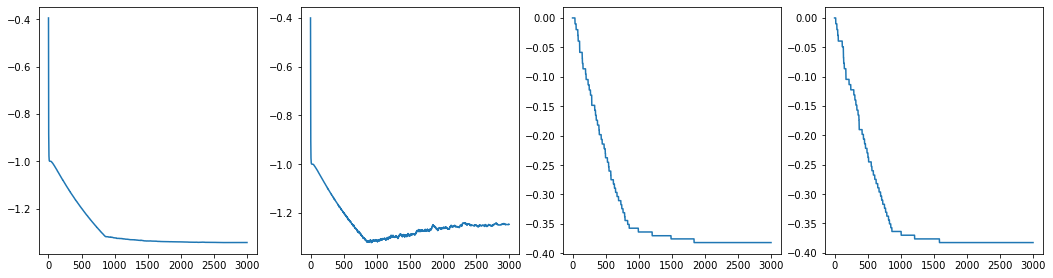

In [17]:
plt.figure(0, figsize=(18,10))

xaxis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(7,5)])))
plt.subplot(241)
plt.plot(xaxis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(7,5)]))
plt.show

xaxis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(2,9)])))
plt.subplot(242)
plt.plot(xaxis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(2,9)]))
plt.show

xaxis = np.asarray(range(0, len(States_track['x-2-x-x-1-x-x-x-x'][(6,5)])))
plt.subplot(243)
plt.plot(xaxis,np.asarray(States_track['x-2-x-x-1-x-x-x-x'][(6,5)]))
plt.show


xaxis = np.asarray(range(0, len(States_track['4-x-x-7-x-x-x-x-x'][(1,1)])))
plt.subplot(244)
plt.plot(xaxis,np.asarray(States_track['4-x-x-7-x-x-x-x-x'][(1,1)]))
plt.show



### Epsilon - decay check

In [18]:
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

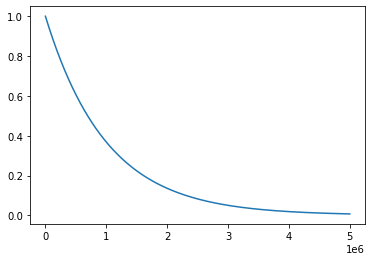

In [19]:
plt.plot(time, epsilon)
plt.show()